# Week Two - Machine Learning & Statistics

### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns`

## Square Root function

Function to find square root of n: 
- Choose a number, x, less than n
- Calculate x$^2$ 
- If x$^2$ < n, choose a larger x
- If x$^2$ > n, choose a smaller x
- Stop when x$^2$ = n

In [63]:
def sq_root(n):
    # for all positive whole numbers less than n
    for i in range (n):
        #calculate the square until it's the same as n
        if i**2 == n:
            #return the root
            return(i)
    #otherwise my n is not a square number and this function cannot return a solution
    else:
        print('Not a square number')
        

In [64]:
sq_root(16)

4

In [65]:
sq_root(17)

Not a square number


The function I've written only calculates the square roots of square numbers, because it is looping through the natural numbers rather than floating numbers. 

Now I'm going to write a function that gives a better approximation for square roots of all natural numbers. 

In [66]:
# Function adapted from https://tour.golang.org/flowcontrol/8

def square_root(x):
    #Initial guess
    z = 1.0
    #Keep guessing to get a better approximation of x
    #until you are within two decimals places 
    while abs(z*z-x)>=0.01:
        #Get  a better approximation of the square root
        z -=(z*z-x)/(2*z)
    #Return z
    return z

In [67]:
square_root(15)

3.872983698008724

### Newton's Method

[Newton's Method - Wikipedia page](https://en.wikipedia.org/wiki/Newton%27s_method)

Newton's method uses differentiation to find an approximation for the square root. If we look at the formula we adapted: 

$ z = z - (z^2-x)/(2z)$

In the numerator I have $z^2 - x$, the difference between the square and my input, and in the denominator, I have the derivative of the numerator. 

What is happening here?? To get a better approximation $z$, I'm subtracting $(z^2-x)/(2z)$ from my current approximation. 

## Two Variables in PyPlot

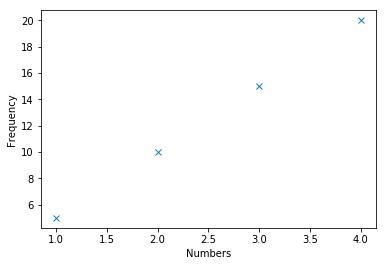

In [77]:
#Input two arrays, xvalues and yvalues and display as points with x
plt.plot([1, 2, 3, 4], [5, 10, 15, 20], 'x')
#Add labels
plt.ylabel('Frequency')
plt.xlabel('Numbers');

In [91]:
#999 numbers between 0 and 100 that are evenly spaced out
x = np.linspace(0, 100, 999)
y = x*x*x
z = x*x

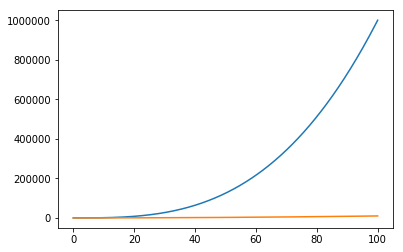

In [92]:
plt.plot(x, y)
plt.plot(x, z);

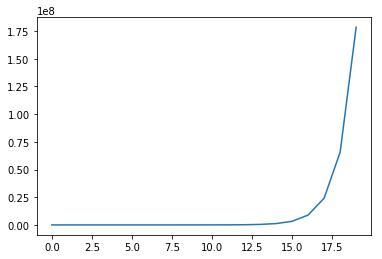

In [133]:
#Plotting an exponential function
y1 = np.exp(x)
plt.plot(x, y1);

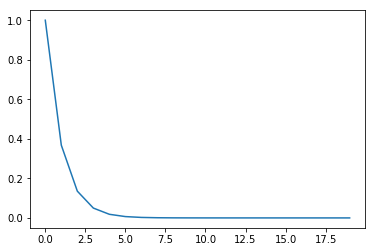

In [132]:
y2 = 1/y1
plt.plot(x, y2);

## Simple Linear Regression

Introducing simple linear regression using machine learning. We have used graphs to model linear and other functions. Linear Regression is working backwords from data to find the function that best represents the data. 

In [111]:
#Generate random data
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

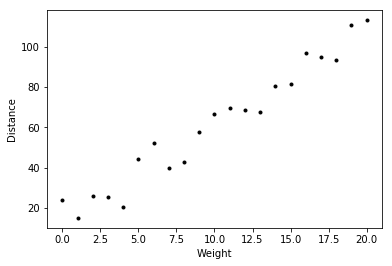

In [115]:
plt.plot(w, d, 'k.')
plt.xlabel('Weight')
plt.ylabel('Distance');

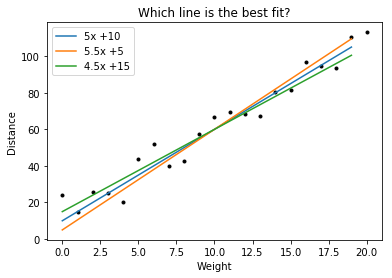

In [138]:
plt.plot(w, d, 'k.')
plt.xlabel('Weight')
plt.ylabel('Distance')
x = np.arange(20)
y1 = 5*x +10
y2 = 5.5*x +5
y3 = 4.5*x +15
plt.plot(x, y1, label = '5x +10')
plt.plot(x, y2, label = '5.5x +5')
plt.plot(x, y3, label = '4.5x +15')
plt.legend()
plt.title('Which line is the best fit?');

A linear function has equation $y = mx+c$. To fit a line to this data, we want to find $m$ (slope) and $c$ (y-intercept).

Machine Learning uses analytics to find the line of best fit. The best line is the one that minimises the following calculated value.

$$ Cost (m,c) = \sum_{i} ( yi − mxi − c) ^2$$

Given the equation of a straight line is $y = mx+c$, a perfect line will have sum of zero. This is because $y-mx-c$ should equal $0$ for all $x$ and $y$ coordinates. We are modelling lines that are not perfectly straight, so we're looking for the $m$ and $c$ values that sum to the smallest possible value. 

Below is the long way to calculate  $m$ and $c$ 

In [135]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.790738 and c is 13.508534.


Alternatively, use numpy.polyfit

In [153]:
[m, c] = np.polyfit(w, d, 1)
print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.790738 and c is 13.508534.


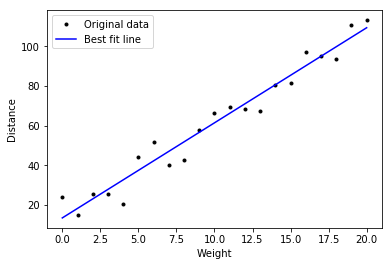

In [152]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight')
plt.ylabel('Distance')
plt.legend()

# Show the plot.
plt.show()